# Faris Abu Farha
# 1200546

# 0. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1-Read the dataset and examine how many features and examples does it have?

In [3]:
df = pd.read_csv('data/cars.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        396 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


There are 8 features and 398 examples

## 2- Are there features with missing values? How many missing values are there in each one?

In [12]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64


from this output we can see how many missing values are there in each feature

## 3- Fill the missing values in each feature using a proper imputation method (for
example: fill with mean, median, or mode) 

In [17]:
df_cleaned = df.fillna({
    'horsepower': df['horsepower'].median(),
    'origin': df['origin'].mode()[0]
    
})
df_cleaned.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

 since the missing values in the horsepower feature are numerical, we can fill them with the median value, but 

## 4- Which country produces cars with better fuel economy?
(Hint: use box plot that shows the mpg for each country (all countries in one plot))

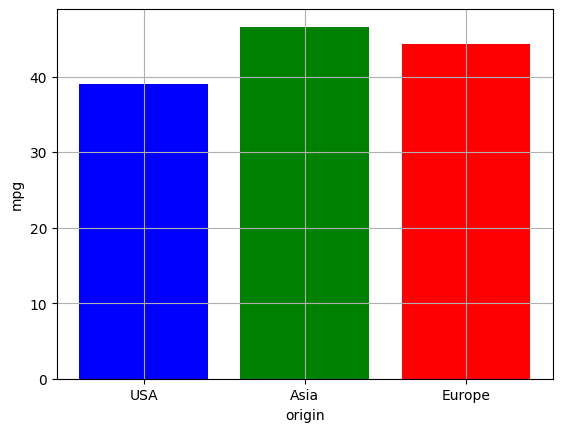

In [74]:
unique_origins = df_cleaned['origin'].unique()

# Set up a color map with a unique color for each origin
color_map = {'USA': 'blue', 'Asia': 'green', 'Europe': 'red'}

# Plot bars with specified colors
for origin in unique_origins:
    subset = df_cleaned[df_cleaned['origin'] == origin] # df[df['origin'] == origin] is a subset of df where the origin is equal to the current origin in the loop
    plt.bar(subset['origin'], subset['mpg'], color=color_map[origin], label=origin)

plt.xlabel('origin')
plt.ylabel('mpg')
plt.grid()
plt.show()

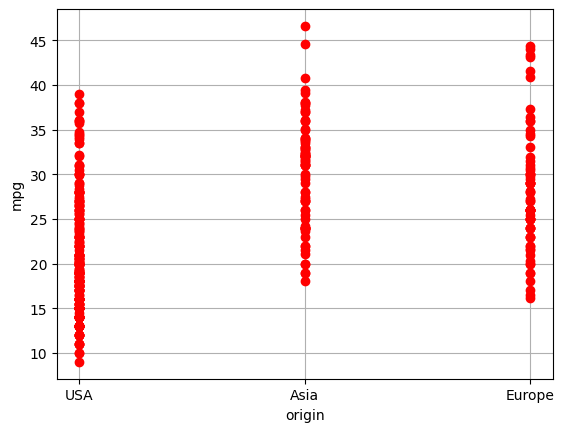

In [55]:
plt.plot(df_cleaned['origin'], df_cleaned['mpg'],'o',color='red') # plot the mpg for each country in one plot
plt.xlabel('origin')
plt.ylabel('mpg')
plt.grid()
plt.show()

from the previous plots we can see that the cars produced in Asia have better fuel economy

## 5- Which of the following features has a distribution that is most similar to a Gaussian: ‘acceleration’, ‘horsepower’, or ‘mpg’? Answer this part by showing the histogram of each feature.

Text(0, 0.5, 'count')

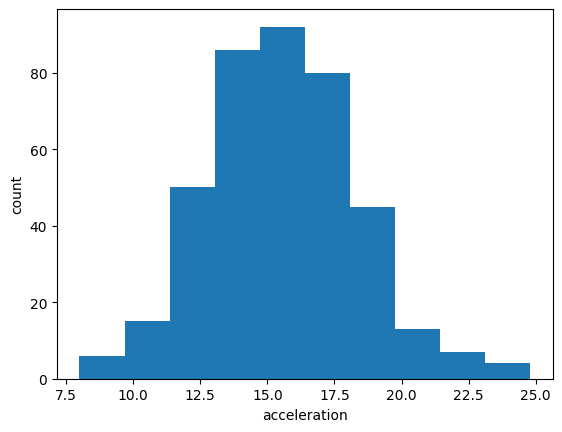

In [59]:
plt.hist(df_cleaned['acceleration'])
plt.xlabel('acceleration')
plt.ylabel('count')

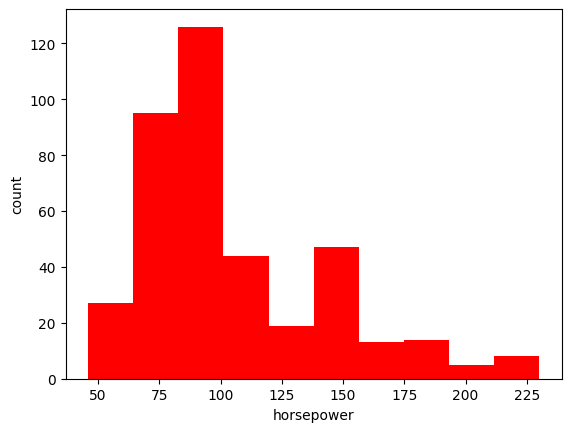

In [61]:
plt.hist(df_cleaned['horsepower'],color='red')
plt.xlabel('horsepower')
plt.ylabel('count')
plt.show()

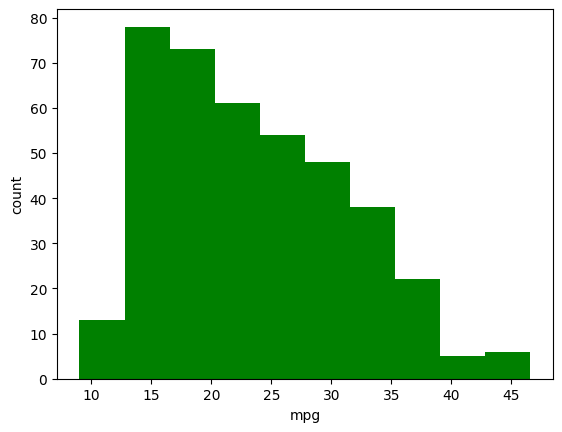

In [62]:
plt.hist(df_cleaned['mpg'],color='green')
plt.xlabel('mpg')
plt.ylabel('count')
plt.show()

from the previous plots we can see that the acceleration feature has a distribution that is most similar to a Gaussian

## 6- Support your answer for part 5 by using a quantitative measure.

In [71]:
# calculate the skewness for each feature
print('acceleration skewness: ',df_cleaned['acceleration'].skew())
print('=====================================')
print('horsepower skewness: ',df_cleaned['horsepower'].skew())
print('=====================================')
print('mpg skewness: ',df_cleaned['mpg'].skew())



acceleration skewness:  0.27877684462588986
horsepower skewness:  1.1062242930872614
mpg skewness:  0.45706634399491913


from the previous output we can see that the acceleration feature has a skewness value that is close to zero, which means that it has a distribution that is most similar to a Gaussian

## 7- Plot a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the y-axis. Is there a correlation between them? Positive or negative?

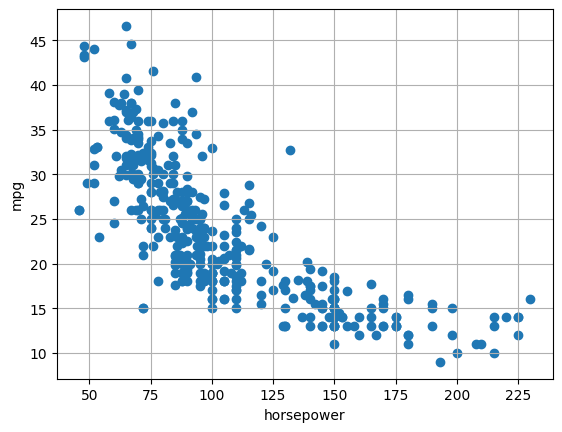

In [73]:
plt.scatter(df_cleaned['horsepower'], df_cleaned['mpg'])
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid()
plt.show()

The scatter plot shows that there is a negative correlation between the horsepower and mpg features 